# Notebook Imports


In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

# Gather Data
 [Source: Original Research Paper ](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1)

In [2]:
boston_dataset = load_boston()
type(boston_dataset)

sklearn.utils.Bunch

In [3]:
dir(boston_dataset) # gives attributes

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Data Points and Features

In [5]:
type(boston_dataset.data)

numpy.ndarray

In [6]:
boston_dataset.data.shape #chaining dot notation #shape gives a tuple

(506, 13)

In [7]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
# Actual prices in thousands (000s)
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data exploration with Pandas dataframes

In [9]:
#Create a pandas dataframe
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

#Add column with the price (target)
data['PRICE'] = boston_dataset.target

In [10]:
data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

In [11]:
data.head()# The top rows look like this

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [12]:
data.tail() # Data at bottom part of dataframe

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [13]:
data.count() # Shows the number of rows for each column

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data- check for missing values

In [14]:
# pandas function to check empty/missing data
pd.isnull(data).any() # if any missing values-gives true

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [15]:
# datframe function to check missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising Data- Histograms, Distributions and Bar Charts

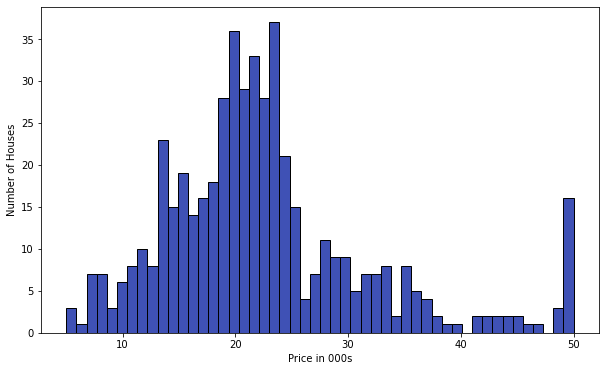

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(data['PRICE'], bins=50, ec='black', color='#3F51B5')
plt.xlabel("Price in 000s")
plt.ylabel('Number of Houses')
plt.show()

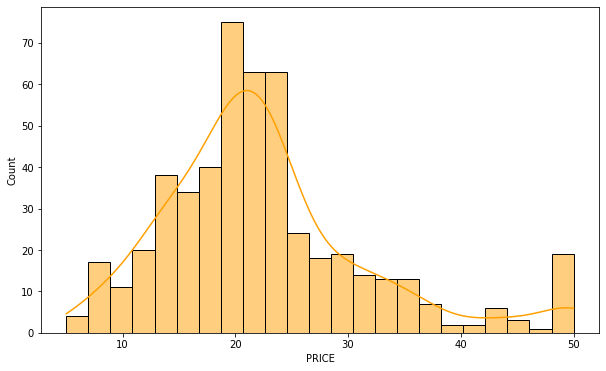

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data['PRICE'], kde=True, color='#FFA000')
plt.show()

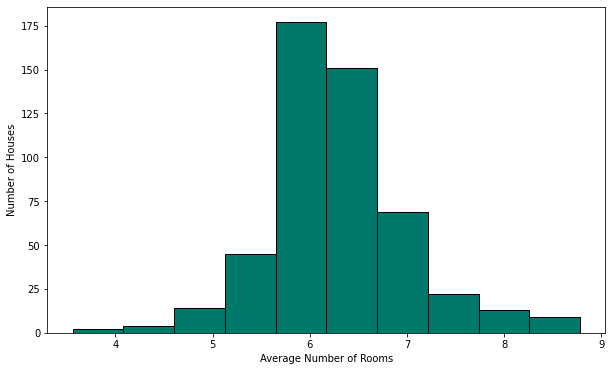

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(data['RM'], ec='black', color='#00796B')
plt.xlabel("Average Number of Rooms")
plt.ylabel('Number of Houses')
plt.show()

In [19]:
data['RM'].mean() #mean method

6.284634387351787

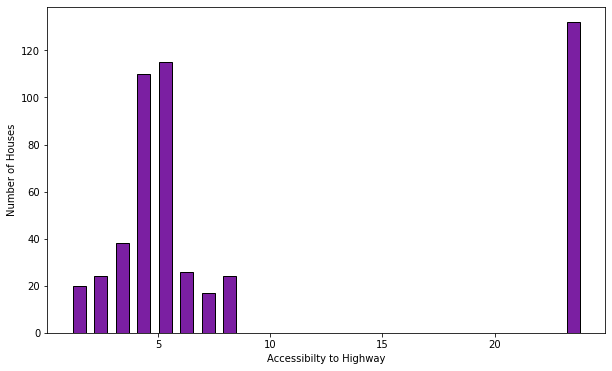

In [20]:
#RAD-Index of accessibility to highways
plt.figure(figsize=(10, 6))
plt.hist(data['RAD'], ec='black', color='#7B1FA2', bins=24, rwidth=0.6)
plt.xlabel("Accessibilty to Highway")
plt.ylabel('Number of Houses')
plt.show()

In [21]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

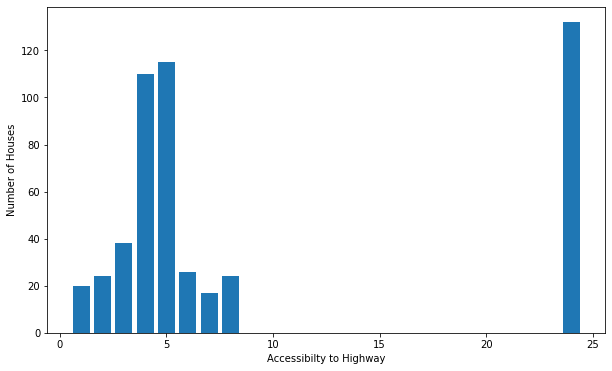

In [22]:
#Bar Chart

frequency= data['RAD'].value_counts()
#type(frequency)
#frequency.index
#frequency.axes[0]
plt.figure(figsize=(10, 6))
plt.xlabel("Accessibilty to Highway")
plt.ylabel('Number of Houses')
plt.bar(frequency.index, height=frequency)
plt.show()

In [23]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

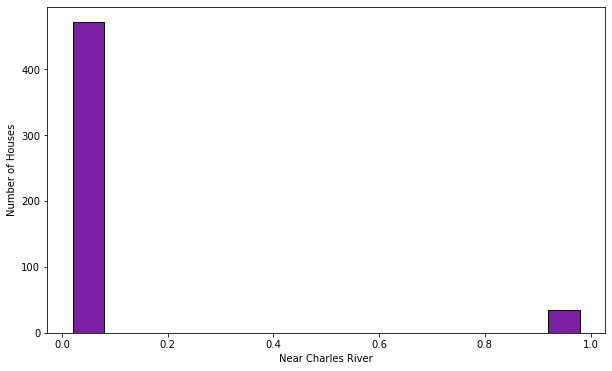

In [24]:
#CHAS-Near Charles River
plt.figure(figsize=(10, 6))
plt.hist(data['CHAS'], ec='black', color='#7B1FA2', rwidth=0.6)
plt.xlabel("Near Charles River")
plt.ylabel('Number of Houses')
plt.show()

## Descriptive Statistics

In [25]:
data['PRICE'].min()

5.0

In [26]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [27]:
data['PRICE'].max()

50.0

In [28]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [29]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [30]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [31]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Correlation- It is the degree to which things move together

## $$ \rho _{XY} = corr(X,Y) $$
### $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [32]:
data['PRICE'].corr(data['RM']) #Coorelation between Price n No. of Rooms

0.6953599470715393

In [33]:
data['PRICE'].corr(data['PTRATIO']) #Coorelation between Price and pupil-teacher ratio

-0.5077866855375616

In [34]:
data.corr() # Pearson Coorelation Coefficients

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

< High correlation between features can be problematic
< Example- you are a medical researcher. Predict bone density using:
                                        1. Age
                                        2. Body fat%
                                        3. weight
  Body fat and weight are highly correlated. This is called Multicollinearity
< Multicollinearity makes findings unreliable estimates and nonsensical           findings
  

In [35]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

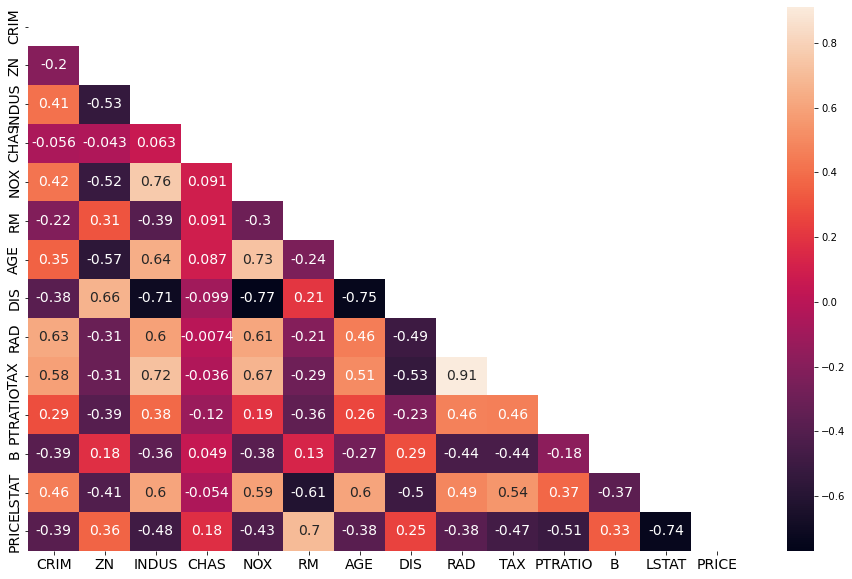

In [36]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show() 

RAD and CHAS are discrete variable (not continous).  So the corr( default method=pearson) is not valid in discrete variable

1) Identified strong correlation - TAX n INDUS 

2) ToDo : Simplify by excluding irrelevant data?

3) ToDo : Test for multicollinearity

##### Limitations of Correlation

-- Correlation applies on Continuous data only

-- Correlation does not imply causation

--Correlation works only on Linear relationships only

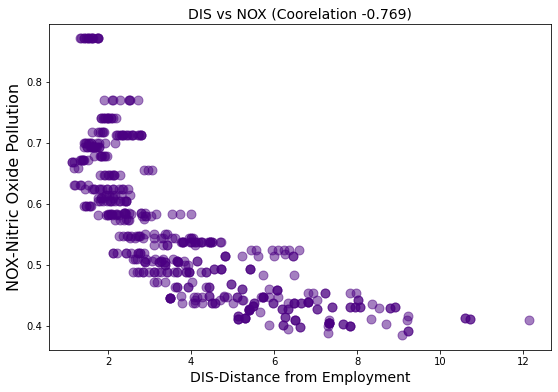

In [37]:
 #Relationship between NOX and DIS
nox_dis_corr = round(data['NOX'].corr(data['DIS']), 3)

plt.figure(figsize=(9,6))
plt.scatter(x=data['DIS'], y=data['NOX'], alpha=0.5, s=80, color='indigo')
plt.title(f'DIS vs NOX (Coorelation {nox_dis_corr})', fontsize=14)
plt.xlabel('DIS-Distance from Employment', fontsize=14)
plt.ylabel('NOX-Nitric Oxide Pollution', fontsize=16)
plt.show()

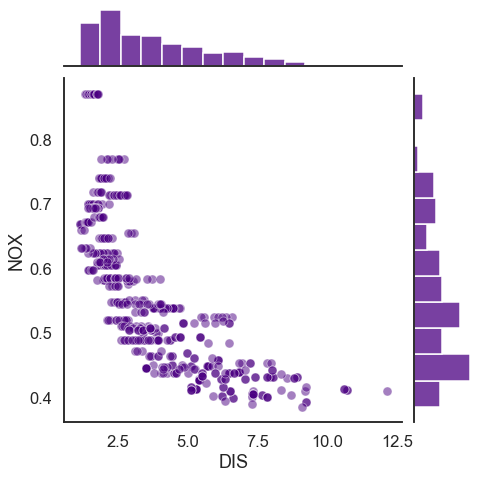

In [38]:
sns.set() # resets the styling to default
sns.set_context('talk')
sns.set_style('white')

sns.jointplot(x=data['DIS'], y=data['NOX'], height=7, color='indigo', joint_kws={'alpha':0.5}) #using seaborn
plt.show()

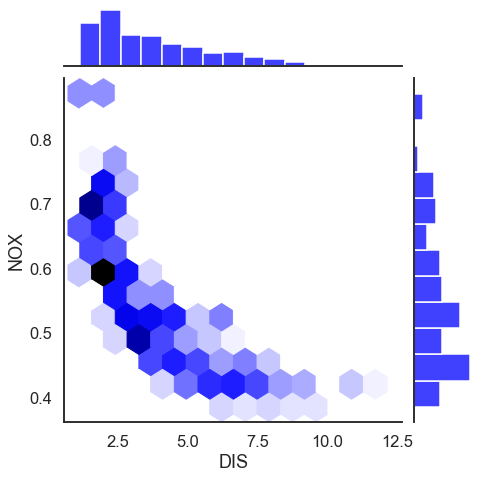

In [39]:
sns.set() # resets the styling to default
sns.set_context('talk')
sns.set_style('white')

sns.jointplot(x=data['DIS'], y=data['NOX'], height=7, color='blue', kind='hex') #using seaborn
plt.show()

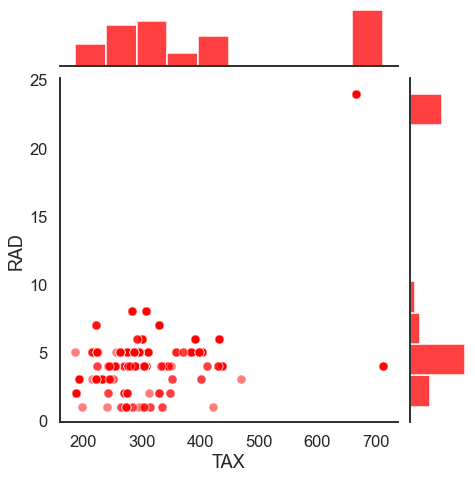

In [40]:
sns.set() # resets the styling to default
sns.set_context('talk')
sns.set_style('white')

sns.jointplot(x=data['TAX'], y=data['RAD'], height=7, color='RED', joint_kws={'alpha':0.5}) #using seaborn
plt.show()

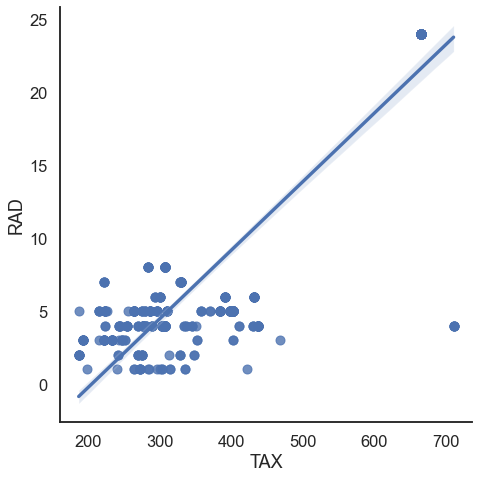

In [41]:
# using seaborn to apply linear regression
sns.lmplot(x='TAX', y='RAD', data=data, height=7) 
plt.show()

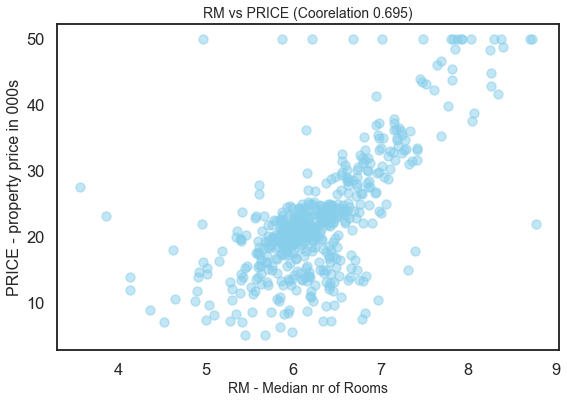

In [42]:
 #Relationship between RM and PRICE
rm_tgt_corr = round(data['RM'].corr(data['PRICE']), 3)

plt.figure(figsize=(9,6))
plt.scatter(x=data['RM'], y=data['PRICE'], alpha=0.5, s=80, color='skyblue')
plt.title(f'RM vs PRICE (Coorelation {rm_tgt_corr})', fontsize=14)
plt.xlabel('RM - Median nr of Rooms', fontsize=14)
plt.ylabel('PRICE - property price in 000s', fontsize=16)
plt.show()

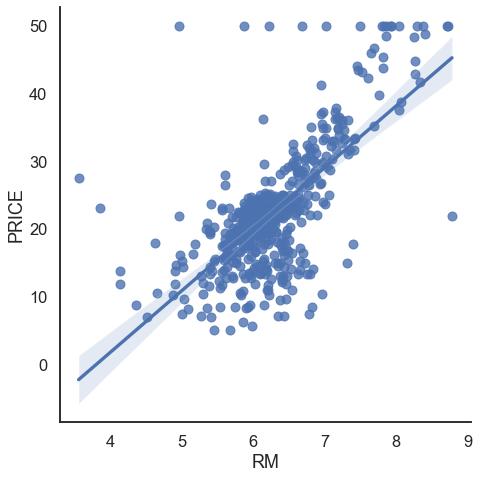

In [43]:
# using seaborn to apply linear regression
sns.lmplot(x='RM', y='PRICE', data=data, height=7) 
plt.show()

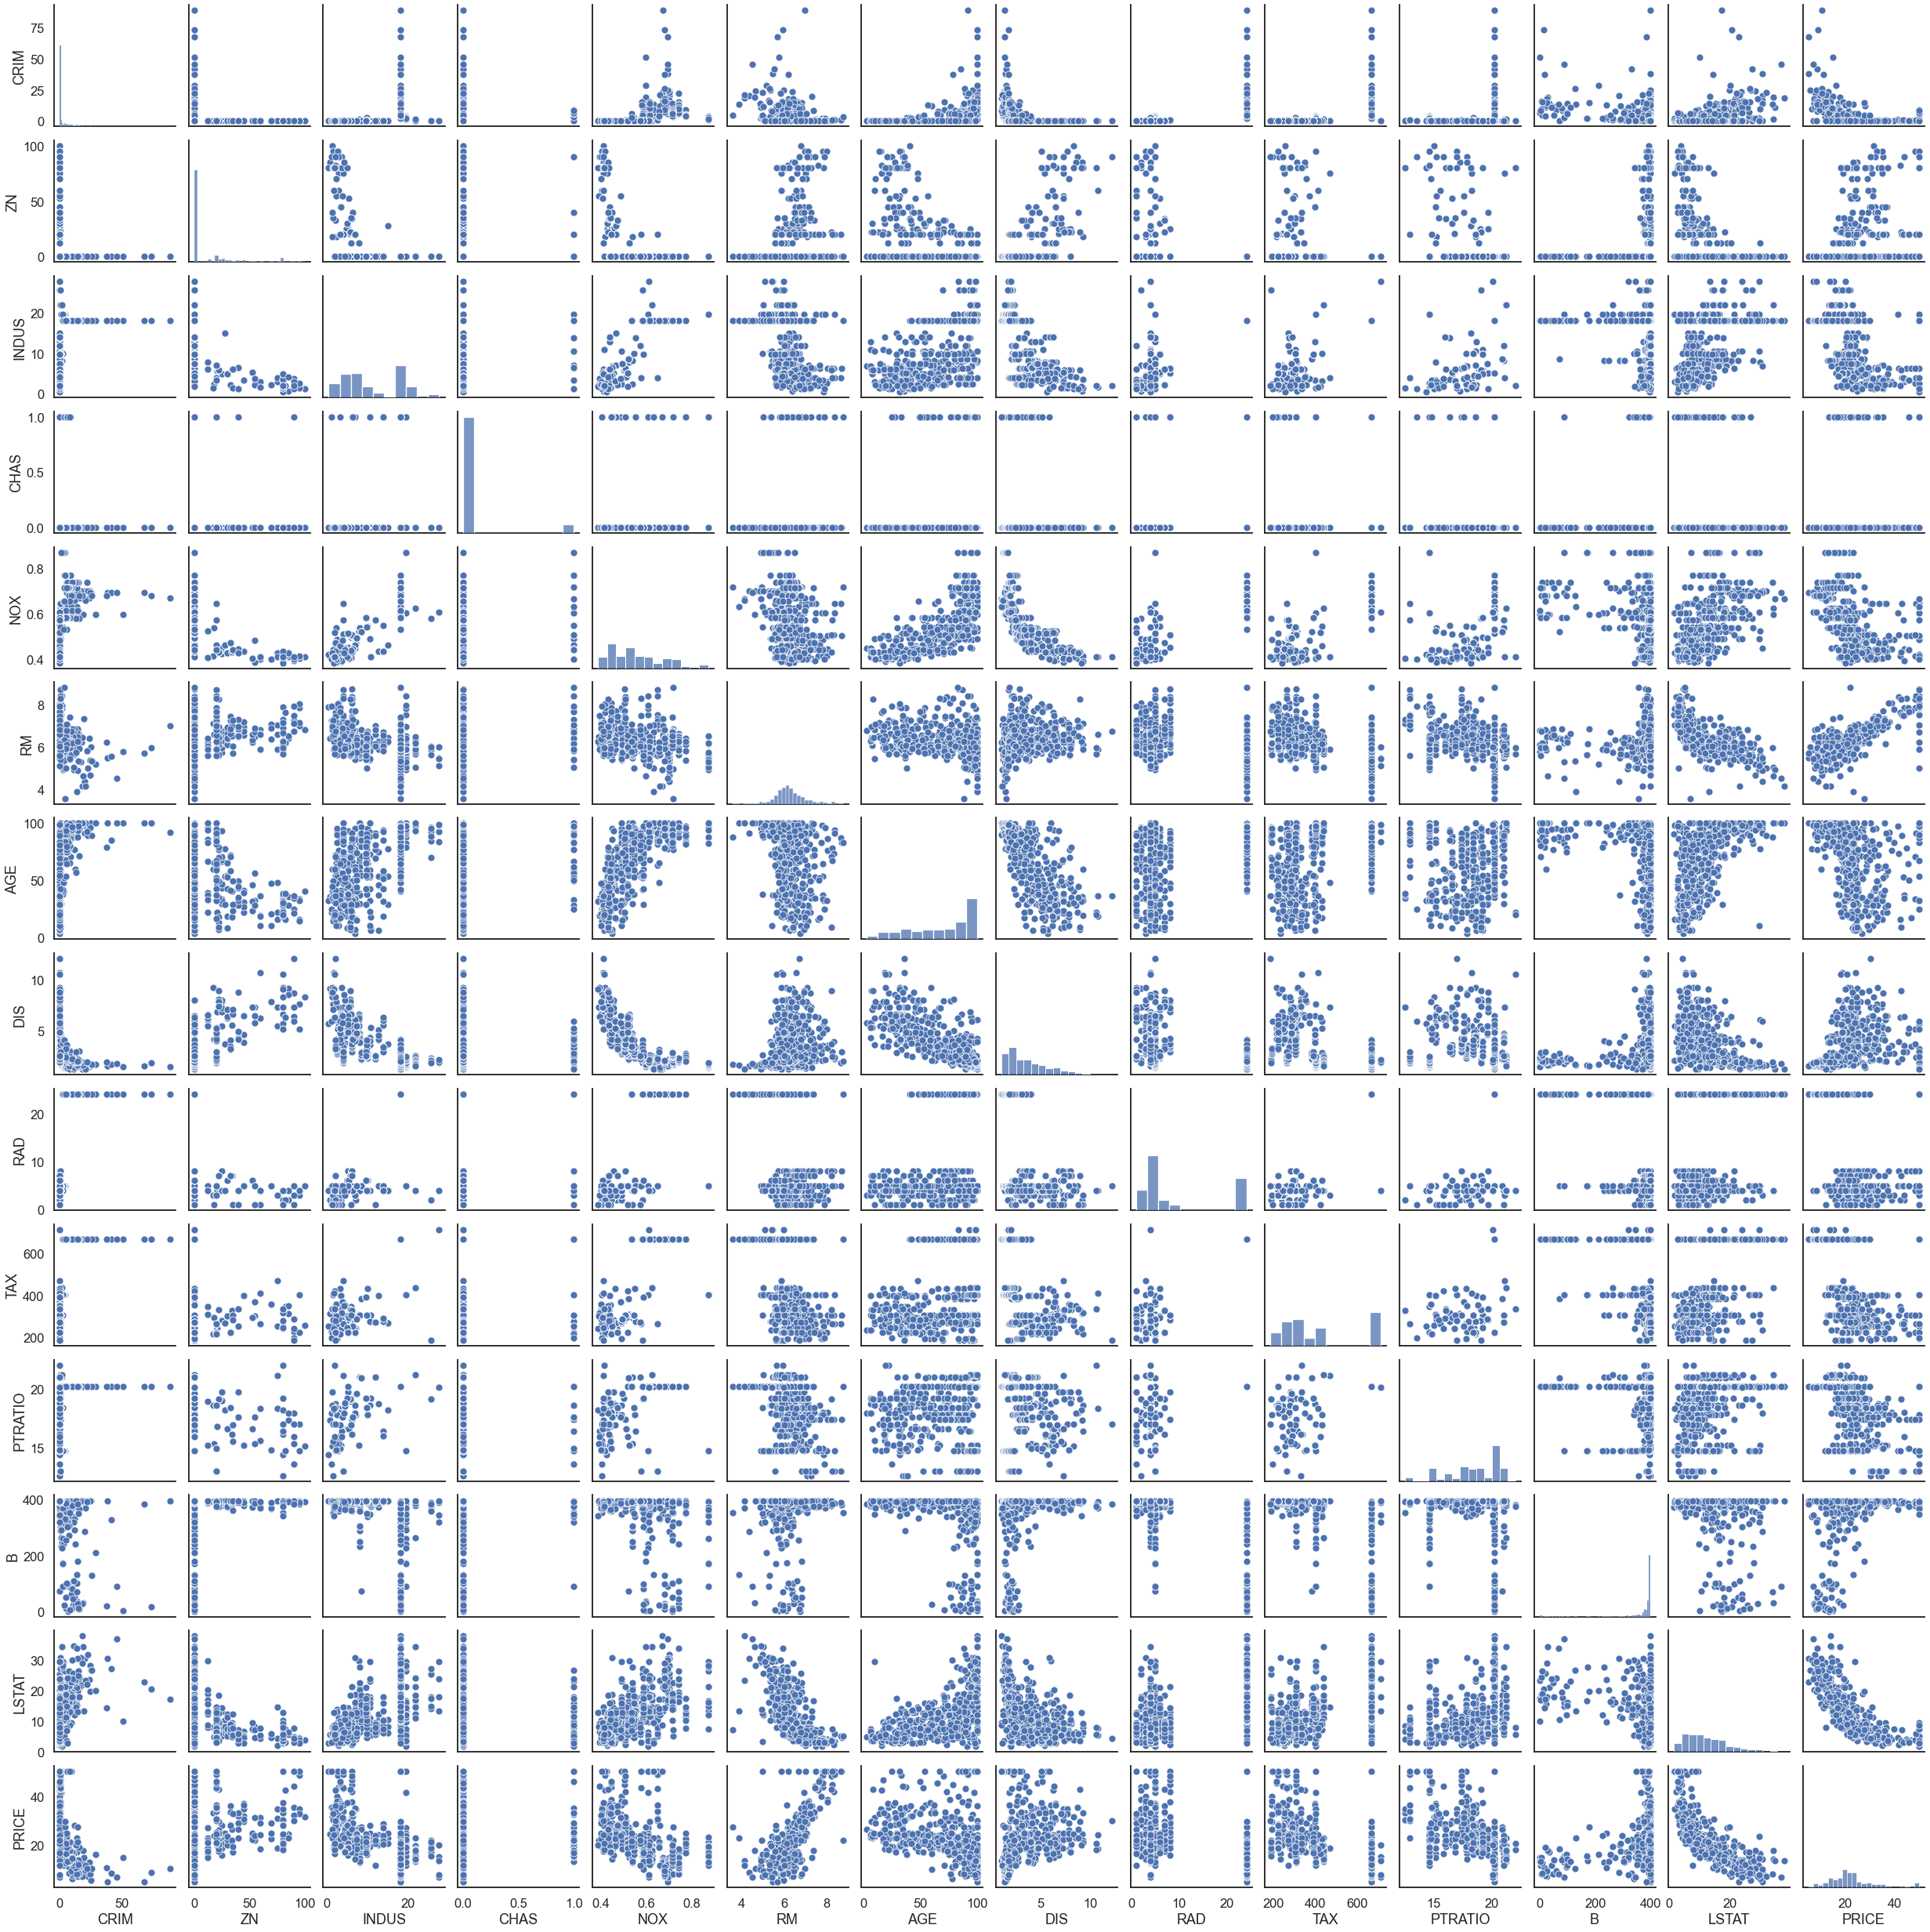

In [44]:
#plotting 
#%%time

sns.pairplot(data)
plt.show()

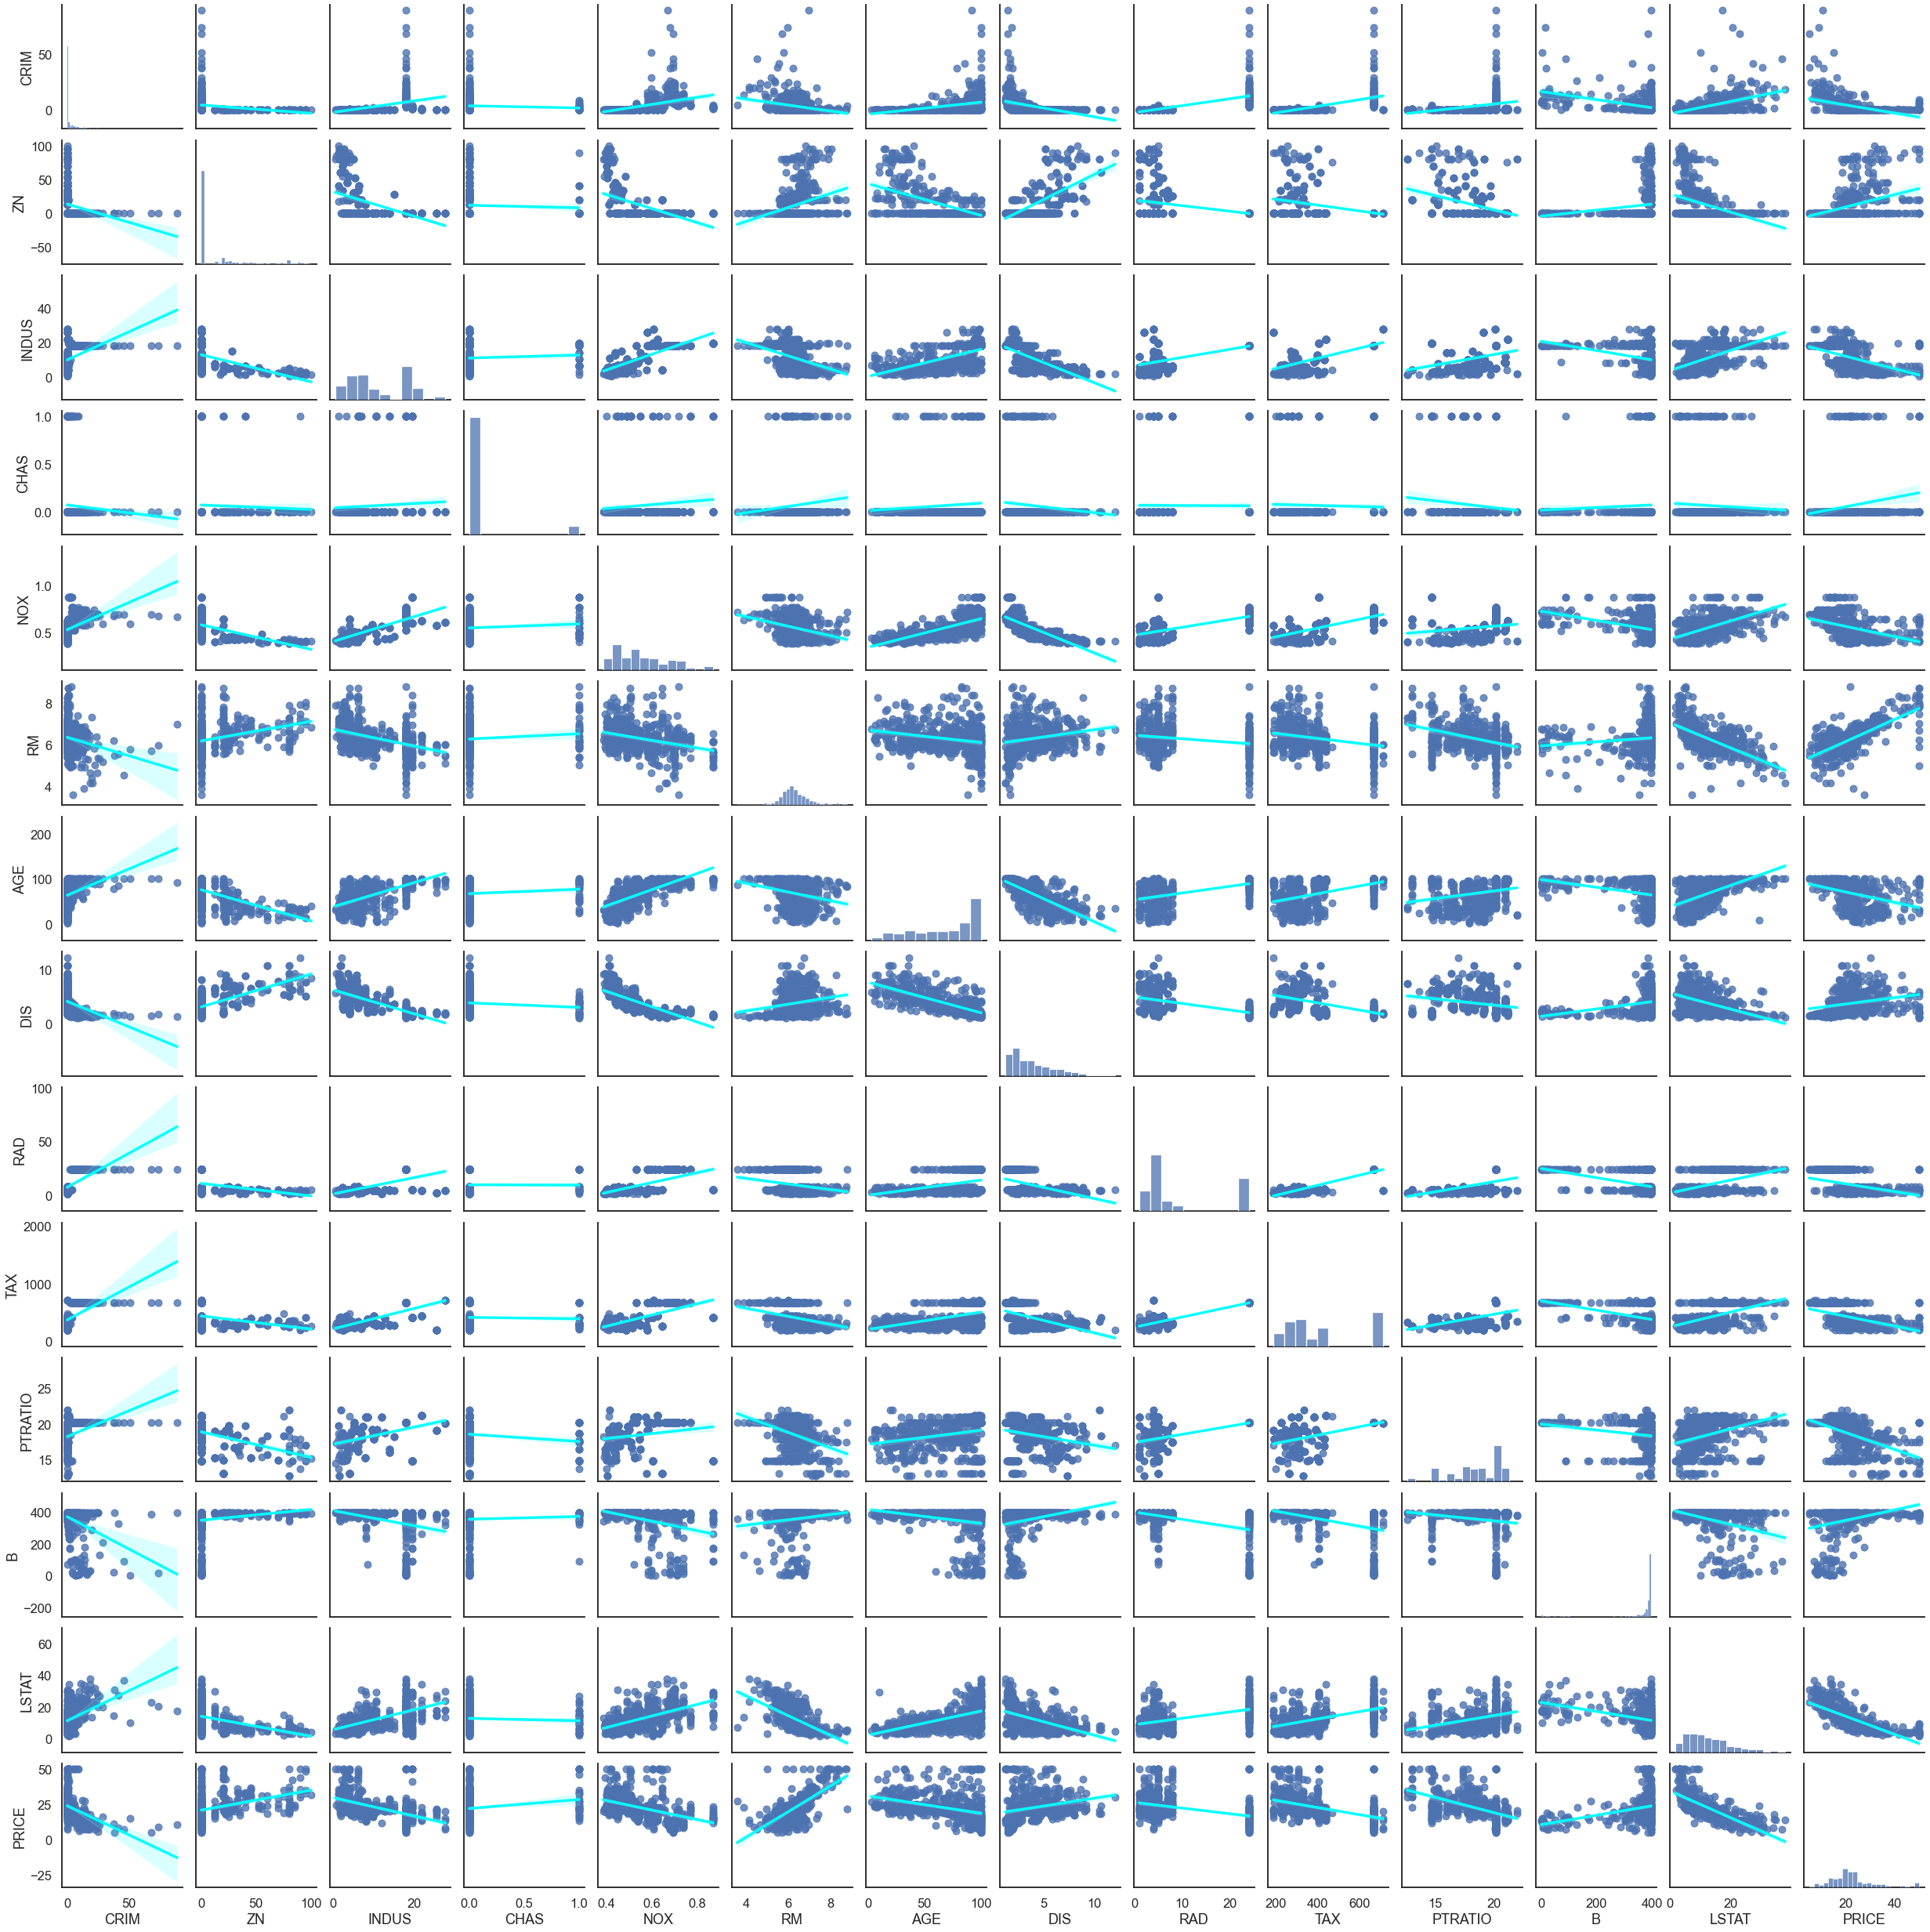

In [45]:
#%%time
sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'cyan'}})
plt.show()                                       

 ##  Training and Test Dataset Split

In [46]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10) #test_size= 0.2 means the test dataset will be 20% of total dataset

#% of training set
len(X_train/len(features))

404

In [47]:
# % of test data set
X_test.shape[0]/features.shape[0]

0.2015810276679842

## Multivariable Regression

In [48]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coef'])


Intercept 36.53305138282446


Coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

In [49]:
# r-squared for training anf test data
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared', regr.score(X_test, y_test))

Training data r-squared: 0.750121534530608
Test data r-squared 0.6709339839115638


 ## Data Transformation

In [50]:
data['PRICE'].skew() #having more data points in one of the tails is called a skew 

1.1080984082549072

In [51]:
y_log = np.log(data['PRICE'])
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: PRICE, dtype: float64

In [52]:
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [53]:
y_log.skew()

-0.33032129530987864

C:\Users\singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log prices wih skew -0.33032129530987864')

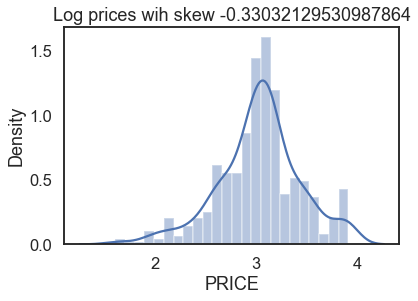

In [54]:
sns.distplot(y_log)
plt.title(f'Log prices wih skew {y_log.skew()}')

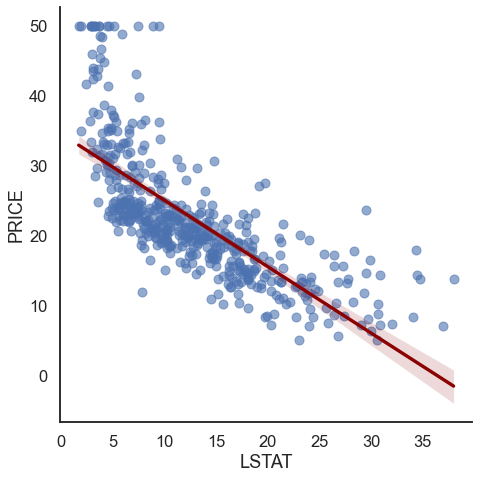

In [55]:
sns.lmplot(x='LSTAT', y='PRICE', data=data, height=7, scatter_kws={'alpha': 0.6}, line_kws={'color':'darkred'})
plt.show()

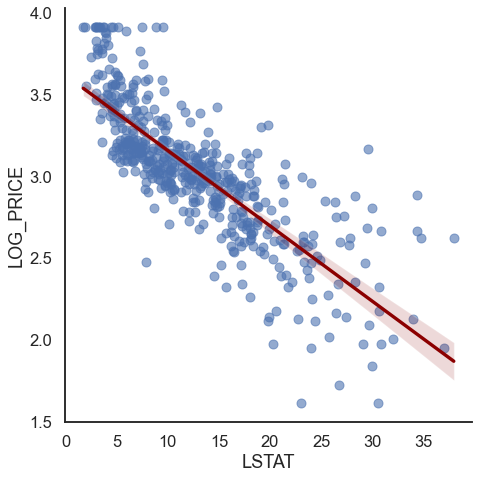

In [56]:
#using log_Price
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, height=7, scatter_kws={'alpha': 0.6}, line_kws={'color':'darkred'})
plt.show()

## Regression using log Prices

In [57]:
prices = np.log(data['PRICE'])
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)
regr = LinearRegression()
regr.fit(X_train, y_train)

# r-squared for training anf test data
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared', regr.score(X_test, y_test)) 

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coef'])



Training data r-squared: 0.7930234826697584
Test data r-squared 0.744692230626074
Intercept 4.059943871775202


Coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

Result of using log prices
1. Higher r-squared
2. Reduced skew in target
3. Better fit

In [58]:
# Charles River Property Premium
np.e**0.080475  #e to the power of (log(coef))

1.0838017512597784

## p values and Evaluating Coefficients

* If p-value <0.05------Statistically Significant
* If p-value >0.05------Statistically Not Significant

In [59]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const) #OLS- Ordinary Least Square, gives linear regression model
results = model.fit()

#results.params
#results.pvalues

pd.DataFrame({'coef': results.params, 'p_values': round(results.pvalues, 3)})

C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


coef  p_values
const    4.059944     0.000
CRIM    -0.010672     0.000
ZN       0.001579     0.009
INDUS    0.002030     0.445
CHAS     0.080331     0.038
NOX     -0.704068     0.000
RM       0.073404     0.000
AGE      0.000763     0.209
DIS     -0.047633     0.000
RAD      0.014565     0.000
TAX     -0.000645     0.000
PTRATIO -0.034795     0.000
B        0.000516     0.000
LSTAT   -0.031390     0.000

* Consequences of Multicollinearity
1. Loss of reliability
2. High variability in theta estimates
3. Strange findings

## Testing for Multicollinearity

$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ...+ \alpha _{12}LSTAT $$
$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $$

* VIF - Variance Inflation factor

In [60]:
#variance_inflation_factor(exog=X_incl_const, exog_idx=1) # gives slice error
type(X_incl_const)
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1) # converting dataframe to ndarray(.values)

1.7145250443932485

In [61]:
# find out numbe rof columns
len(X_incl_const.columns)
X_incl_const.shape[1]

14

In [62]:
vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=i)  
                        for i in range(len(X_incl_const.columns))]
    
pd.DataFrame({'coef': X_incl_const.columns,'VIF': np.round(vif, 2)}) 

coef     VIF
0     const  597.55
1      CRIM    1.71
2        ZN    2.33
3     INDUS    3.94
4      CHAS    1.08
5       NOX    4.41
6        RM    1.84
7       AGE    3.33
8       DIS    4.22
9       RAD    7.31
10      TAX    8.51
11  PTRATIO    1.84
12        B    1.34
13    LSTAT    2.81

* VIF > 10 , features would be considered problematic.
* our results for VIF is below 10, don't have multicollinearity problem

## Model Simplification & the BIC 

* Lower the BIC, better the model

In [63]:
# Original model with log prices and all features

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const) #OLS- Ordinary Least Square, gives linear regression model
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params,'p-value': round(results.pvalues,3)}) 

print('BIC is:',results.bic)
print('r-squared is:',results.rsquared)

C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


BIC is: -139.74997769478898
r-squared is: 0.7930234826697584


In [64]:
# Reduced model #1 excluding INDUS

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis=1)


model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef': results.params,'p-value': round(results.pvalues,3)}) 

print('BIC is:',results.bic)
print('r-squared is:',results.rsquared)

BIC is: -145.1450885559114
r-squared is: 0.7927126289415162


C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [65]:
# Reduced model #2 excluding AGE and INDUS

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['AGE', 'INDUS'], axis=1)


model = sm.OLS(y_train, X_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({'coef': results.params,'p-value': round(results.pvalues,3)}) 

print('BIC is:',results.bic)
print('r-squared is:',results.rsquared)

BIC is: -149.49934294224656
r-squared is: 0.7918657661852815


C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [66]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)

coef  p-value      coef  p-value      coef  p-value
const    4.059944    0.000  4.056231    0.000  4.035922    0.000
CRIM    -0.010672    0.000 -0.010721    0.000 -0.010702    0.000
ZN       0.001579    0.009  0.001551    0.010  0.001461    0.014
INDUS    0.002030    0.445       NaN      NaN       NaN      NaN
CHAS     0.080331    0.038  0.082795    0.032  0.086449    0.025
NOX     -0.704068    0.000 -0.673365    0.000 -0.616448    0.000
RM       0.073404    0.000  0.071739    0.000  0.076133    0.000
AGE      0.000763    0.209  0.000766    0.207       NaN      NaN
DIS     -0.047633    0.000 -0.049394    0.000 -0.052692    0.000
RAD      0.014565    0.000  0.014014    0.000  0.013743    0.000
TAX     -0.000645    0.000 -0.000596    0.000 -0.000590    0.000
PTRATIO -0.034795    0.000 -0.034126    0.000 -0.033481    0.000
B        0.000516    0.000  0.000511    0.000  0.000518    0.000
LSTAT   -0.031390    0.000 -0.031262    0.000 -0.030271    0.000

## Residuals and Residuals Plots

* Residuals -1. Difference between the target value and the predicted value.
           2. Used to check if assumptions hold and model is valid
           3. Residuals should be random (i.e. no pattern)
           4. Residuals should be normally distributed (cloud shape)

C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


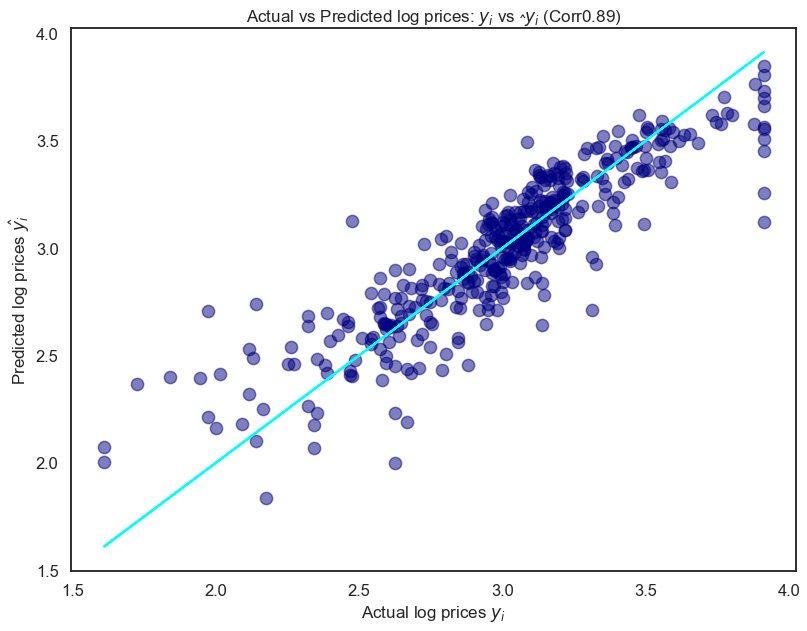

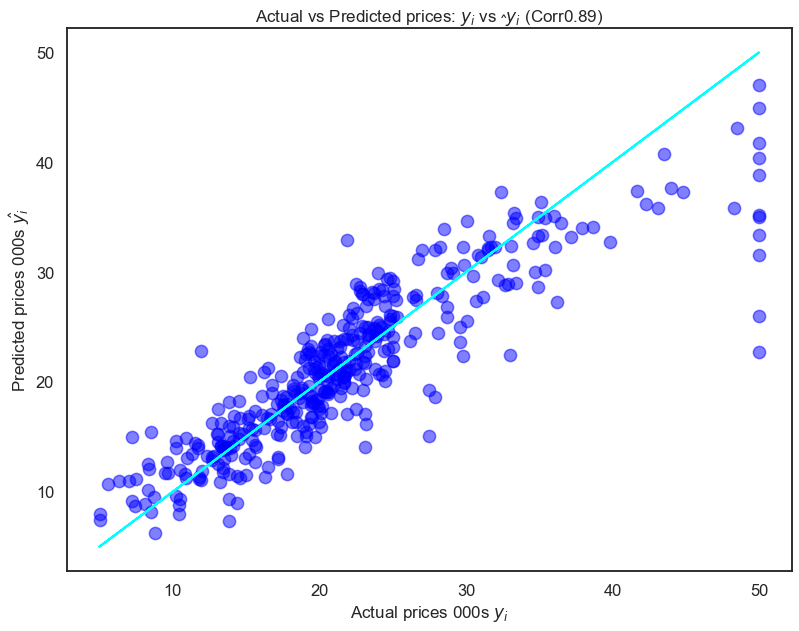

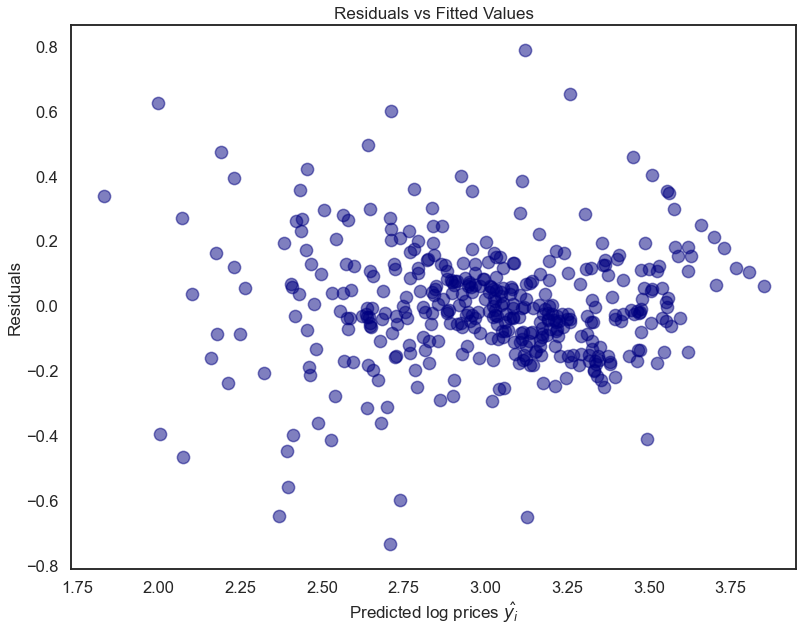

In [67]:
# Modified Model: transformed (using log prices) $ simplified (dropping two features)
prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Using Statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Residuals
# residuals = y_train - results.fittedvalues
#results.resid #statsmodel attribute

#Graph of actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2) #correlation between y_train n predicted y values 

plt.figure(figsize=[13,10])
plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.5, s=150)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=17)
plt.ylabel('Predicted log prices $\hat{y _i}$', fontsize=17)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y _i$ (Corr{corr})', fontsize=17)
plt.show()

plt.figure(figsize=[13,10])
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='blue', alpha=0.5, s=150)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=17)
plt.ylabel('Predicted prices 000s $\hat{y _i}$', fontsize=17)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y _i$ (Corr{corr})', fontsize=17)
plt.show()


# Residuals vs Predicted values

plt.figure(figsize=[13,10])
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.5, s=150)

plt.xlabel('Predicted log prices $\hat{y _i}$', fontsize=17)
plt.ylabel('Residuals', fontsize=17)
plt.title('Residuals vs Fitted Values', fontsize=17)
plt.show()

# Mean square error and R-squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

C:\Users\singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


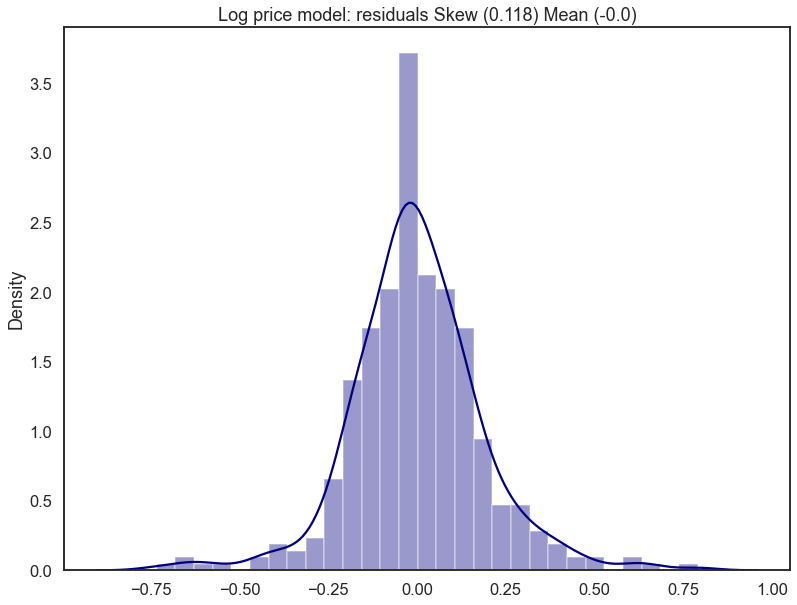

In [68]:
# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

plt.figure(figsize=[13,10])
sns.distplot(results.resid, color='navy')
plt.title(f'Log price model: residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

In [69]:
#Using original model with all the featires and normal prices generate:
#Plot of actual vs predicted prices (incl. correlation)  using a different color
#Plot of residuals vs. predicted prices
#Plot of distribution of residuals (incl. skew)
#Analyse the results

C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


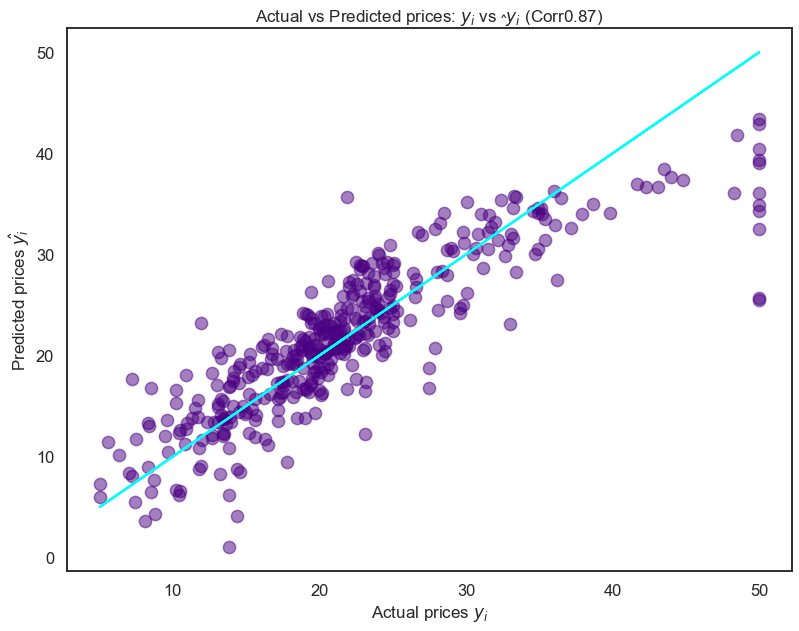

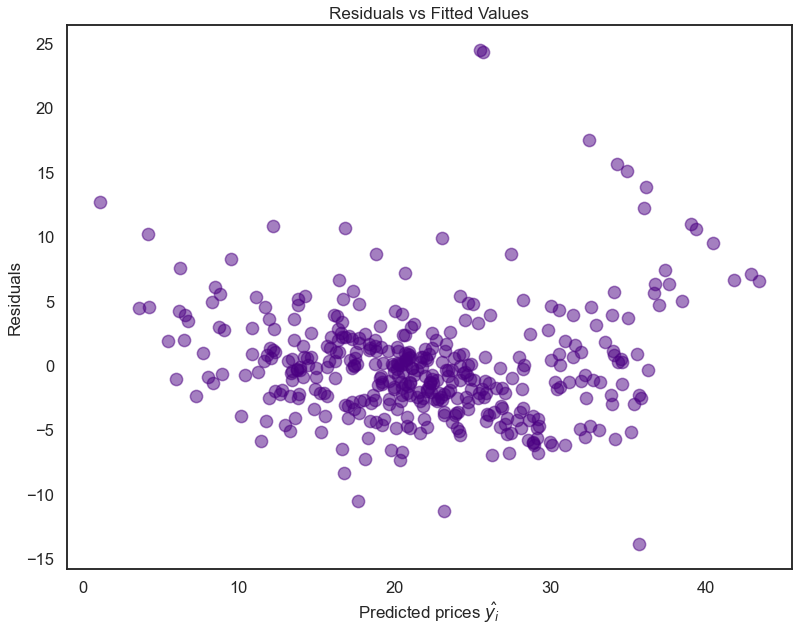

C:\Users\singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


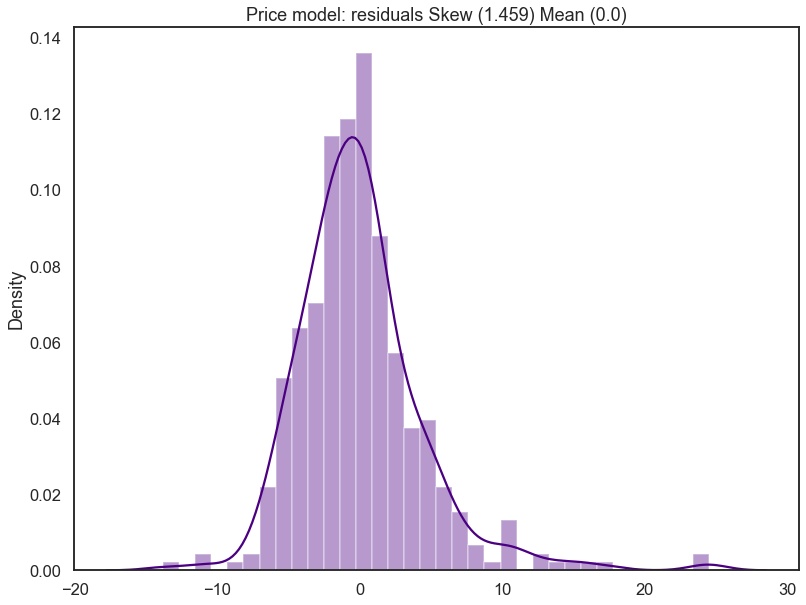

19.921


In [70]:
# Original Model: normal prices &  all features
prices = data['PRICE']
features = data.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

#Graph of actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2) #correlation between y_train n predicted y values 

plt.figure(figsize=[13,10])
plt.scatter(x= y_train, y= results.fittedvalues, c='indigo', alpha=0.5, s=150)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual prices $y _i$', fontsize=17)
plt.ylabel('Predicted prices $\hat{y _i}$', fontsize=17)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y _i$ (Corr{corr})', fontsize=17)
plt.show()

# Residuals vs Predicted values
plt.figure(figsize=[13,10])
plt.scatter(x=results.fittedvalues, y=results.resid, c='indigo', alpha=0.5, s=150)

plt.xlabel('Predicted prices $\hat{y _i}$', fontsize=17)
plt.ylabel('Residuals', fontsize=17)
plt.title('Residuals vs Fitted Values', fontsize=17)
plt.show()

# Distribution of Residuals (prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

plt.figure(figsize=[13,10])
sns.distplot(results.resid, color='indigo')
plt.title(f'Price model: residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Mean square error and R-squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)
print(full_normal_mse)

C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


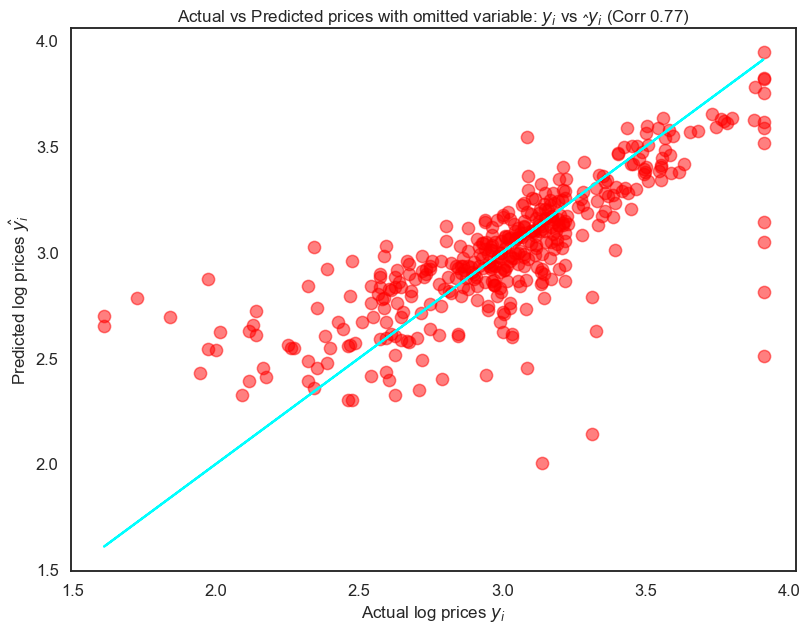

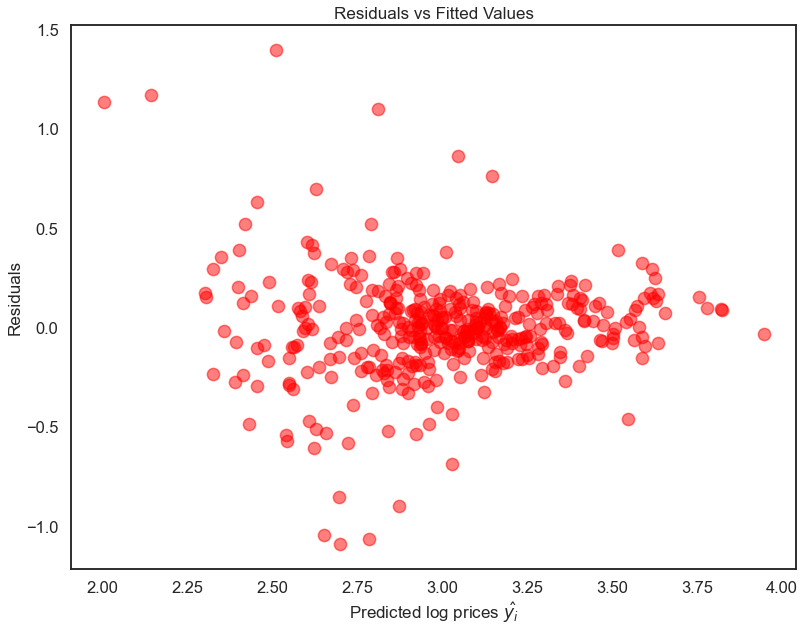

In [71]:
# Model: Omiting key features using log prices
prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'LSTAT', 'AGE', 'CRIM','NOX'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

#Graph of actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2) #correlation between y_train n predicted y values 

plt.figure(figsize=[13,10])
plt.scatter(x= y_train, y= results.fittedvalues, c='red', alpha=0.5, s=150)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=17)
plt.ylabel('Predicted log prices $\hat{y _i}$', fontsize=17)
plt.title(f'Actual vs Predicted prices with omitted variable: $y _i$ vs $\hat y _i$ (Corr {corr})', fontsize=17)
plt.show()

# Residuals vs Predicted values
plt.figure(figsize=[13,10])
plt.scatter(x=results.fittedvalues, y=results.resid, c='red', alpha=0.5, s=150)

plt.xlabel('Predicted log prices $\hat{y _i}$', fontsize=17)
plt.ylabel('Residuals', fontsize=17)
plt.title('Residuals vs Fitted Values', fontsize=17)
plt.show()

# Mean square error and R-squared
omitted_var_mse = round(results.mse_resid, 3)
omitted_var_rsquared = round(results.rsquared, 3)

In [72]:
pd.DataFrame({'R-Squared': [reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared],
               'MSE': [reduced_log_mse, full_normal_mse, omitted_var_mse],
            'RMSE': np.sqrt([reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared])},
               index= ['Reduced Log Model', 'Full Normal Price Model', 'Omitted Var Model'])

R-Squared     MSE      RMSE
Reduced Log Model            0.792   0.035  0.889944
Full Normal Price Model      0.750  19.921  0.866025
Omitted Var Model            0.593   0.068  0.770065

In [74]:
# Challenge: Our estimate for a house price is $30,000. Calculate the upper and lower bound
# for a 95% prediction interval using the reduced log model

print('1 s.d in log prices is', np.sqrt(reduced_log_mse))
print('2 s.d in log prices is', 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('The upper bound in log prices for a 95% prediction interval is ', upper_bound)
print('The upper bound for normal prices is $', np.e**upper_bound * 1000)

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The lower bound in log prices for a 95% prediction interval is ', upper_bound)
print('The lower bound for normal prices is $', np.e**lower_bound * 1000)

1 s.d in log prices is 0.18708286933869708
2 s.d in log prices is 0.37416573867739417
The upper bound in log prices for a 95% prediction interval is  3.7753631203395495
The upper bound for normal prices is $ 43613.34233239937
The lower bound in log prices for a 95% prediction interval is  3.7753631203395495
The lower bound for normal prices is $ 20635.886906824155
